<a href="https://colab.research.google.com/github/arnavwinner/ML_Project/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Use the 'files.upload()' function to upload your dataset
uploaded = files.upload()

# Provide the file path to the uploaded dataset
file_path = '/content/' + list(uploaded.keys())[0]

# You can verify the file is uploaded using the following line
print("Uploaded file:", file_path)


Saving archive(3).zip to archive(3) (1).zip
Uploaded file: /content/archive(3) (1).zip


## Extraction of Dataset

In [ ]:
import zipfile

# Specify the path to the uploaded ZIP file
zip_file_path = '/content/' + list(uploaded.keys())[0]

# Specify the directory where you want to extract the contents
extracted_dir_path = '/content/my_dataset2/'

# Create the target directory if it doesn't exist
import os
os.makedirs(extracted_dir_path, exist_ok=True)

# Extract the ZIP file to the target directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

# List the contents of the extracted directory
extracted_files = os.listdir(extracted_dir_path)
print("Extracted files:", extracted_files)

Extracted files: ['14-celebrity-faces-dataset']


## Preprosessing


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import json

# Define parameters for preprocessing
image_size = (224, 224)  # Set the desired image size
batch_size = 5  # Set your batch size

# Create an ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to the range [0, 1]
    rotation_range=20,  # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20%
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20%
    shear_range=0.2,  # Apply shear transformation
    zoom_range=0.2,  # Randomly zoom in/out
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill in empty areas with the nearest pixel value
)

# Load and preprocess the dataset
train_data = datagen.flow_from_directory(
    '/content/my_dataset2/14-celebrity-faces-dataset/data/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'  # Adjust as needed (binary, sparse, etc.)
)

# (Optional) Save the data preprocessing settings for later use
datagen_config = {
    'rescale': 1.0 / 255.0,
    'rotation_range': 20,
    'width_shift_range': 0.2,
    'height_shift_range': 0.2,
    'shear_range': 0.2,
    'zoom_range': 0.2,
    'horizontal_flip': True,
    'fill_mode': 'nearest'
}

# with open('/kaggle/working/datagen_config.json', 'w') as f:
#     json.dump(datagen_config, f)

# (Optional) Save the class labels for later use
# class_labels = list(train_data.class_indices.keys())
# with open('/kaggle/working/class_labels.txt', 'w') as f:
#     f.write('\n'.join(class_labels))

Found 220 images belonging to 14 classes.


In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the dataset directory
dataset_dir = '/content/my_dataset2/14-celebrity-faces-dataset/data/train'

# List the available dog breed classes
dog_breeds = [breed for breed in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, breed))]

# Count the number of images for each breed
breed_counts = {breed: len(os.listdir(os.path.join(dataset_dir, breed))) for breed in dog_breeds}

# Display the number of images for each breed
print("Number of images for each class:")
for breed, count in breed_counts.items():
    print(f"{breed}: {count} images")

# Choose a sample image from one of the breeds for visualization


Number of images for each class:
dwayne_johnson: 15 images
arnold_schwarzenegger: 18 images
keanu_reeves: 11 images
lauren_cohan: 10 images
anne_hathaway: 15 images
ben_afflek: 14 images
will_smith: 16 images
simon_pegg: 14 images
mindy_kaling: 22 images
kate_beckinsale: 11 images
elton_john: 17 images
sofia_vergara: 17 images
jerry_seinfeld: 21 images
madonna: 19 images


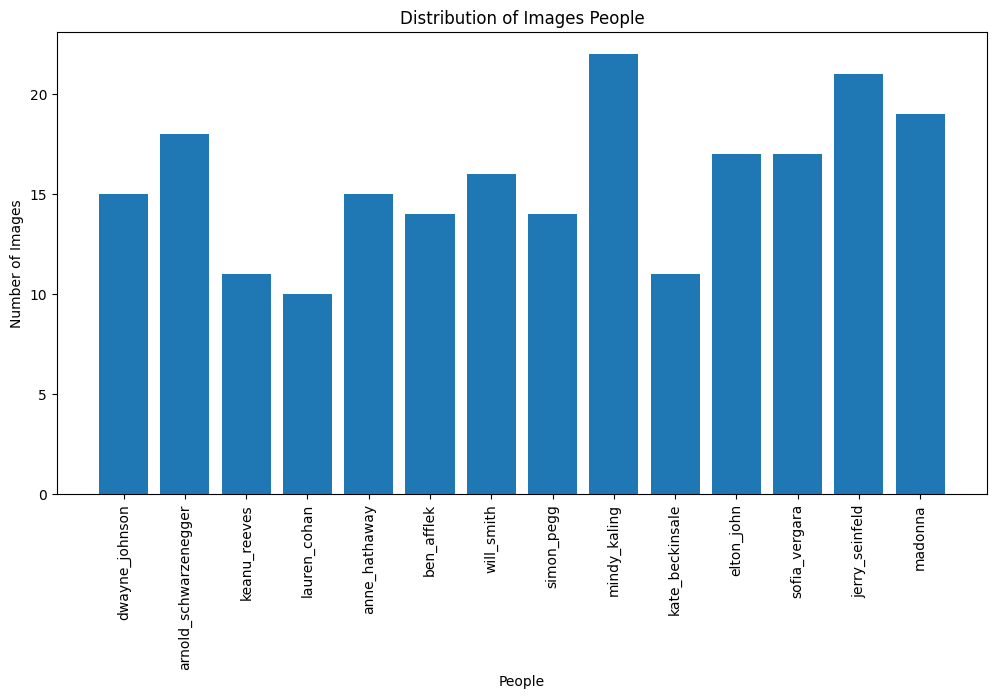

In [ ]:
import matplotlib.pyplot as plt

# Count the number of images for each breed
people_counts = {breed: len(os.listdir(os.path.join(dataset_dir, breed))) for breed in dog_breeds}

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(people_counts.keys(), people_counts.values())
plt.xlabel('People')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)
plt.title('Distribution of Images People')
plt.show()

## Listing Names

In [ ]:
import os
import random
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
people = list(people_counts.keys())
print(people)

['dwayne_johnson', 'arnold_schwarzenegger', 'keanu_reeves', 'lauren_cohan', 'anne_hathaway', 'ben_afflek', 'will_smith', 'simon_pegg', 'mindy_kaling', 'kate_beckinsale', 'elton_john', 'sofia_vergara', 'jerry_seinfeld', 'madonna']


## Collecting X_train, y_train, X_test, y_test, X_val and y_val

In [ ]:
import random
import cv2
import os
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# Initialize one-hot encoder and label encoder
onehot_encoder = OneHotEncoder(sparse=False)
label_encoder = LabelEncoder()

def collectdata(directory, num_samples_per_class,people):
    X_portion = []
    y_portion = []

    for label in people:
        label_dir = os.path.join(directory, label)
        print(label_dir)
        image_files = [f for f in os.listdir(label_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

        if len(image_files) < num_samples_per_class:
            num_samples_per_class = len(image_files)

        selected_files = random.sample(image_files, num_samples_per_class)

        for filename in selected_files:
            img_path = os.path.join(label_dir, filename)
            img = cv2.imread(img_path)

            if img is not None:
                img = cv2.resize(img, (224, 224))
                X_portion.append(img)
                y_portion.append(label)

    X_portion = np.array(X_portion) / 255
    y_portion = label_encoder.fit_transform(y_portion)
    y_portion = onehot_encoder.fit_transform(y_portion.reshape(-1, 1))

    return X_portion, y_portion

# Example usage:
X_train, y_train = collectdata('/content/my_dataset2/14-celebrity-faces-dataset/data/train', 10,people)
X_val, y_val = collectdata('/content/my_dataset2/14-celebrity-faces-dataset/data/val', 4,people)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)



/content/my_dataset2/14-celebrity-faces-dataset/data/train/dwayne_johnson
/content/my_dataset2/14-celebrity-faces-dataset/data/train/arnold_schwarzenegger
/content/my_dataset2/14-celebrity-faces-dataset/data/train/keanu_reeves
/content/my_dataset2/14-celebrity-faces-dataset/data/train/lauren_cohan
/content/my_dataset2/14-celebrity-faces-dataset/data/train/anne_hathaway
/content/my_dataset2/14-celebrity-faces-dataset/data/train/ben_afflek
/content/my_dataset2/14-celebrity-faces-dataset/data/train/will_smith
/content/my_dataset2/14-celebrity-faces-dataset/data/train/simon_pegg
/content/my_dataset2/14-celebrity-faces-dataset/data/train/mindy_kaling
/content/my_dataset2/14-celebrity-faces-dataset/data/train/kate_beckinsale
/content/my_dataset2/14-celebrity-faces-dataset/data/train/elton_john
/content/my_dataset2/14-celebrity-faces-dataset/data/train/sofia_vergara
/content/my_dataset2/14-celebrity-faces-dataset/data/train/jerry_seinfeld
/content/my_dataset2/14-celebrity-faces-dataset/data/t

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


/content/my_dataset2/14-celebrity-faces-dataset/data/val/dwayne_johnson
/content/my_dataset2/14-celebrity-faces-dataset/data/val/arnold_schwarzenegger
/content/my_dataset2/14-celebrity-faces-dataset/data/val/keanu_reeves
/content/my_dataset2/14-celebrity-faces-dataset/data/val/lauren_cohan
/content/my_dataset2/14-celebrity-faces-dataset/data/val/anne_hathaway
/content/my_dataset2/14-celebrity-faces-dataset/data/val/ben_afflek
/content/my_dataset2/14-celebrity-faces-dataset/data/val/will_smith
/content/my_dataset2/14-celebrity-faces-dataset/data/val/simon_pegg
/content/my_dataset2/14-celebrity-faces-dataset/data/val/mindy_kaling
/content/my_dataset2/14-celebrity-faces-dataset/data/val/kate_beckinsale
/content/my_dataset2/14-celebrity-faces-dataset/data/val/elton_john
/content/my_dataset2/14-celebrity-faces-dataset/data/val/sofia_vergara
/content/my_dataset2/14-celebrity-faces-dataset/data/val/jerry_seinfeld
/content/my_dataset2/14-celebrity-faces-dataset/data/val/madonna
(140, 224, 224,

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Applied CNN

## Results

In [ ]:
pip install opencv-python numpy tensorflow


### Training CNN model and getting the Test, Validation, and Training accuracy

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.regularizers import l2

# Function to load images from a directory
def load_images(directory):
    images = []
    labels = []
    class_label = 0

    for root, dirs, files in os.walk(directory):
        for file in files:
          print(file)
          if file.endswith(('jpg', 'jpeg', 'png')):
                img_path = os.path.join(root, file)
                img = load_img(img_path, target_size=(324, 324))
                img_array = img_to_array(img)
                images.append(img_array)
                labels.append(class_label)

        class_label += 1

    return np.array(images), np.array(labels)

# Set the paths to your existing training and validation data directories
train_data_dir = '/content/my_dataset2/14-celebrity-faces-dataset/data/train'
val_data_dir = '/content/my_dataset2/14-celebrity-faces-dataset/data/val'

# Load training data
X_train, y_train = load_images(train_data_dir)

# Load validation data
X_val, y_val = load_images(val_data_dir)

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_val = X_val / 255.0

# Ensure that class labels are within the correct range
num_classes = len(np.unique(y_train))  # Get the number of unique classes
y_train = y_train % num_classes  # Ensure labels are within the range [0, num_classes)
y_val = y_val % num_classes

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(324, 324, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.1)))  # Add L2 regularization
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=l2(0.1)))  # Add L2 regularization
model.add(layers.Dense(14, activation='softmax'))

# Decrease the learning rate
custom_optimizer = optimizers.Adam(learning_rate=0.000006)  # Set the learning rate as needed
model.compile(optimizer=custom_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()
CNN = model

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=2)
print("Validation Accuracy:", history.history['val_accuracy'][-1])
Acc = history.history['val_accuracy'][-1]
wt_cnn = Acc

401px-DwyaneJohnson.jpg
800px-Evan_Mathis_and_Dwayne_Johnson.jpg
400px-Dwayne_The_Rock_Johnson_trees_portrait_2009.jpg
400px-Dwayne_Johnson_(8557374996).jpg
Dwayne_Johnson_2,_2013.jpg
434px-Dwayne_The_Rock_Johnson_street_Tribeca_2009_portrait.jpg
Dwayne_Johnson_2014(Cropped).jpg
449px-Dwayne_Johnson_at_the_2009_Tribeca_Film_Festival.jpg
400px-Dwayne_Johnson,_Steve_Peacocke_2014.jpg
390px-Intercontinental_Champion_THE_ROCK.jpg
404px-Dwayne_Johnson_(8556239847).jpg
307px-Dwayne_'The_Rock'_Johnson_2016.jpg
461px-WWE_-_Sheffield_020499_(49).jpg
450px-The_Rock_Axxess_2002.jpg
Dwayne_Johnson.jpg
Arnold_Schwarzenegger_2.jpg
Arnold_Schwarzenegger_2004-01-30.jpg
Arnold_Schwarzenegger_from_acrofan.jpg
505px-Arnold_Schwarzenegger_September_2017.jpg
442px-Arnold_Schwarzenegger_2,_2012.jpg
490px-Arnold_Schwarzenegger.jpg
Arnold_Schwarzenegger.jpg
2002197_Arnold_Schwarzenegger_visited_the_Camp_Pendleton_Base_Theater_2015.jpg
Christopher_Cox_and_Arnold_Schwarzenegger.jpg
471px-Schwarzenegger_Dec_2015

### Training VGG_16

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define data augmentation and preprocessing for the training dataset
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define data augmentation and preprocessing for the validation dataset
val_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Define base path and other parameters
base_path = "/content/my_dataset2/14-celebrity-faces-dataset/data/train"
val_path = "/content/my_dataset2/14-celebrity-faces-dataset/data/val"
batch_size = 5
num_epochs = 20

# Load and preprocess the training data
train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

# Load and preprocess the validation data
validation_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=2,
    class_mode='categorical',
    shuffle=True,

)

# Load pre-trained VGGFace model (without top layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers for face recognition
x = base_model.output
x = Flatten()(x)
x = Dense(192, activation='relu')(x)  # Adjust the number of units as needed
output = Dense(len(train_generator.class_indices), activation='softmax')(x)

VGG16 = Model(inputs=base_model.input, outputs=output)

# Compile the model with appropriate loss and optimizer
VGG16.compile(optimizer=Adam(learning_rate=0.000003), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model on your dataset
history = VGG16.fit(train_generator, validation_data=validation_generator, epochs=num_epochs)

# Save the trained model for future use
VGG16.save('face_recognition_model.h5')

# Load your trained model
VGG16 = tf.keras.models.load_model('face_recognition_model.h5')  # Replace with the path to your model

# Evaluate the model on the validation set
val_loss, val_accuracy = VGG16.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
wt_vgg = val_accuracy*100


Found 220 images belonging to 14 classes.
Found 70 images belonging to 14 classes.
Epoch 1/20
44/44 [==============================] - 11s 132ms/step - loss: 2.7723 - accuracy: 0.0955 - val_loss: 2.6976 - val_accuracy: 0.1000
Epoch 2/20
44/44 [==============================] - 5s 120ms/step - loss: 2.6076 - accuracy: 0.1136 - val_loss: 2.6235 - val_accuracy: 0.1714
Epoch 3/20
44/44 [==============================] - 7s 169ms/step - loss: 2.5366 - accuracy: 0.1364 - val_loss: 2.5829 - val_accuracy: 0.1714
Epoch 4/20
44/44 [==============================] - 5s 115ms/step - loss: 2.4442 - accuracy: 0.2091 - val_loss: 2.5498 - val_accuracy: 0.1571
Epoch 5/20
44/44 [==============================] - 5s 113ms/step - loss: 2.3510 - accuracy: 0.2545 - val_loss: 2.4818 - val_accuracy: 0.2000
Epoch 6/20
44/44 [==============================] - 6s 139ms/step - loss: 2.2611 - accuracy: 0.2909 - val_loss: 2.4256 - val_accuracy: 0.2000
Epoch 7/20
44/44 [==============================] - 5s 114ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


35/35 [==============================] - 1s 18ms/step - loss: 2.5788 - accuracy: 0.4000
Validation Accuracy: 40.00%


In [ ]:
from tensorflow.keras.preprocessing import image

### We will be storing all the results predicted using vgg16 in vgg_predictions

In [ ]:
vgg_predictions = []

1/1 [==============================] - 0s 37ms/step
Predicted Class Label for Face 1: kate_beckinsale


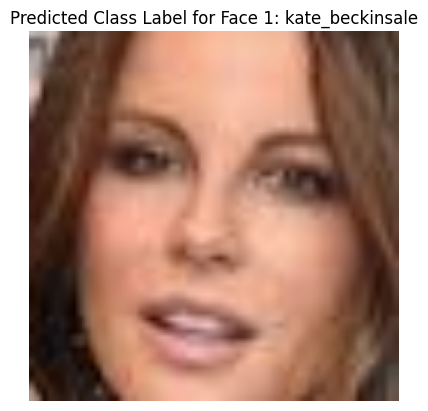

In [ ]:
import cv2
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def get_embedding(model, face):
    # Resize the face to match the model's input size (160x160)
    face = cv2.resize(face, (160, 160))

    # Normalize pixel values to be in the range [-1, 1]
    face = (face / 255.0 - 0.5) * 2.0

    # Expand dimensions to match the model's expected input shape
    sample = np.expand_dims(face, axis=0)

    # Make prediction to get embedding
    yhat = model.predict(sample)
    return yhat[0]

# Assuming num_classes is defined somewhere in your code
num_classes = 14

# Assuming best_model is defined somewhere in your code as an SVM model

# Load the image
image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEluXvXakm4C9WmfGzh-vAor3Q_-YyfTI4ZA&usqp=CAU'
req = urllib.request.urlopen(image_url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Load a pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(img_rgb, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Iterate through the detected faces
for i, (x, y, w, h) in enumerate(faces):
    # Extract the face
    face_img = img_rgb[y:y + h, x:x + w]

    # Resize the face image to match the VGG16 input size (224, 224)
    face_img_resized = cv2.resize(face_img, (224, 224))

    # Preprocess the face image for VGG16
    face_img_array = image.img_to_array(face_img_resized)
    face_img_array = np.expand_dims(face_img_array, axis=0)
    face_img_array /= 255.0  # Normalize pixel values to be between 0 and 1

    # Make predictions using the trained VGG16 model
    predictions = VGG16.predict(face_img_array)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions)

    # Map the class index to the original class label
    class_labels = {v: k for k, v in train_generator.class_indices.items()}
    predicted_class_label = class_labels[predicted_class_index]
    vgg_predictions.append(predicted_class_label)
    # Print the predicted class label
    print(f"Predicted Class Label for Face {i+1}: {predicted_class_label}")

    # Display the face
    plt.imshow(face_img_resized)
    plt.title(f"Predicted Class Label for Face {i+1}: {predicted_class_label}")
    plt.axis('off')
    plt.show()


In [ ]:
pip install MTCNN

In [ ]:
for x in vgg_predictions:
  print(x)

simon_pegg
simon_pegg
keanu_reeves
madonna
ben_afflek
ben_afflek


['dwayne_johnson', 'arnold_schwarzenegger', 'keanu_reeves', 'lauren_cohan', 'anne_hathaway', 'ben_afflek', 'will_smith', 'simon_pegg', 'mindy_kaling', 'kate_beckinsale', 'elton_john', 'sofia_vergara', 'jerry_seinfeld', 'madonna']


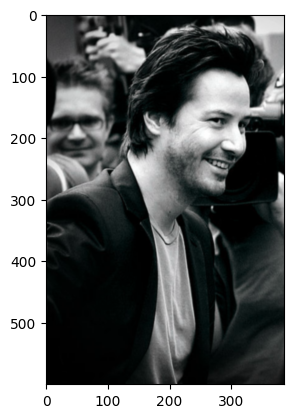

(600, 387, 3)


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # opencv
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from keras.models import load_model
from PIL import Image

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/content/my_dataset2/14-celebrity-faces-dataset/data/train"))

# Any results you write to the current directory are saved as output.
try:
    img = cv2.imread('/content/my_dataset2/14-celebrity-faces-dataset/data/train/keanu_reeves/387px-KeanuReevesLakehouse.jpg')
    plt.imshow(img, cmap='gray', interpolation='bicubic')
    plt.show()
    print(img.shape)
except Exception as e:
    print(f"An error occurred: {str(e)}")

#### extract_face is function used to extract face from an image while training the facenet with svm model

1/1 [==============================] - 0s 120ms/step


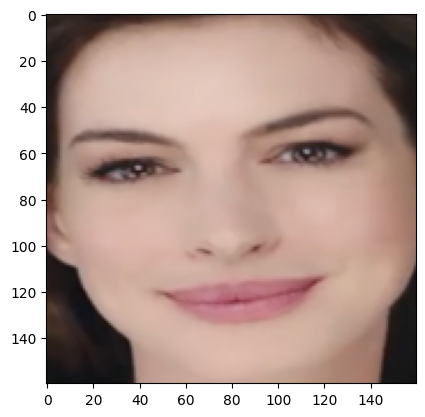

(160, 160, 3)


In [ ]:
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

# load the photo and extract the face
pixels = extract_face('/content/my_dataset2/14-celebrity-faces-dataset/data/train/anne_hathaway/696px-Anne_Hathaway_AHC.png')
plt.imshow(pixels)
plt.show()
print(pixels.shape)

In [ ]:
def load_face(dir):
    faces = list()
    # enumerate files
    for filename in os.listdir(dir):
        path = dir + filename
        face = extract_face(path)
        faces.append(face)
    return faces

def load_dataset(dir):
    # list for faces and labels
    X, y = list(), list()
    for subdir in os.listdir(dir):
        path = dir + subdir + '/'
        faces = load_face(path)
        labels = [subdir for i in range(len(faces))]
        print("loaded %d sample for class: %s" % (len(faces),subdir) ) # print progress
        X.extend(faces)
        y.extend(labels)
    return np.asarray(X), np.asarray(y)


# load train dataset
trainX, trainy = load_dataset('/content/my_dataset2/14-celebrity-faces-dataset/data/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('/content/my_dataset2/14-celebrity-faces-dataset/data/val/')
print(testX.shape, testy.shape)

np.savez_compressed('dataset.npz', trainX, trainy, testX, testy)

1/1 [==============================] - 1s 683ms/step
loaded 15 sample for class: dwayne_johnson
1/1 [==============================] - 0s 249ms/step
loaded 18 sample for class: arnold_schwarzenegger
1/1 [==============================] - 1s 887ms/step
loaded 11 sample for class: keanu_reeves
1/1 [==============================] - 0s 128ms/step
loaded 10 sample for class: lauren_cohan
1/1 [==============================] - 0s 250ms/step
loaded 15 sample for class: anne_hathaway
1/1 [==============================] - 0s 127ms/step
loaded 14 sample for class: ben_afflek
1/1 [==============================] - 0s 208ms/step
loaded 16 sample for class: will_smith
1/1 [==============================] - 0s 172ms/step
loaded 14 sample for class: simon_pegg
1/1 [==============================] - 0s 221ms/step
loaded 22 sample for class: mindy_kaling
1/1 [==============================] - 0s 188ms/step
loaded 11 sample for class: kate_beckinsale
1/1 [==============================] - 0s 134ms/ste

In [ ]:

data = np.load('dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (220, 160, 160, 3) (220,) (70, 160, 160, 3) (70,)


## Importing Facenet

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(160, 160, 3))
base_model.trainable = False

# Add custom layers for face recognition
facenet_model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128),
    layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1))
])

In [ ]:
def get_embedding(model, face):
    # scale pixel values
    face = face.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    # transfer face into one sample (3 dimension to 4 dimension)
    sample = np.expand_dims(face, axis=0)
    # make prediction to get embedding
    yhat = model.predict(sample)
    return yhat[0]

# convert each face in the train set into embedding
emdTrainX = list()
for face in trainX:
    emd = get_embedding(facenet_model, face)
    emdTrainX.append(emd)

emdTrainX = np.asarray(emdTrainX)
print(emdTrainX.shape)

# convert each face in the test set into embedding
emdTestX = list()
for face in testX:
    emd = get_embedding(facenet_model, face)
    emdTestX.append(emd)
emdTestX = np.asarray(emdTestX)
print(emdTestX.shape)

# save arrays to one file in compressed format
np.savez_compressed('Files.npz', emdTrainX, trainy, emdTestX, testy)

1/1 [==============================] - 0s 43ms/step
(220, 128)
1/1 [==============================] - 0s 40ms/step
(70, 128)


In [ ]:
from sklearn.model_selection import cross_val_score


#### Training Facenet and SVM for face extraction and identification respectively

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.svm import SVC

# Assuming emdTrainX, emdTestX, trainy, and testy are already defined

print("Dataset: train=%d, test=%d" % (emdTrainX.shape[0], emdTestX.shape[0]))

# Normalize input vectors
in_encoder = Normalizer()
emdTrainX_norm = in_encoder.transform(emdTrainX)
emdTestX_norm = in_encoder.transform(emdTestX)

# Label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy_enc = out_encoder.transform(trainy)
testy_enc = out_encoder.transform(testy)

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {'C': reciprocal(3, 3000),
              'gamma': reciprocal(0.001, 0.1), 'kernel': ['rbf']}

random_search = RandomizedSearchCV(SVC(probability=True), param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(emdTrainX_norm, trainy_enc)

# Get the best parameters
best_params = random_search.best_params_

# Use the best parameters to train the final model
best_model = SVC(probability=True, **best_params)
best_model.fit(emdTrainX_norm, trainy_enc)

# Predict and evaluate
yhat_train = best_model.predict(emdTrainX_norm)
yhat_test = best_model.predict(emdTestX_norm)

score_train = accuracy_score(trainy_enc, yhat_train)
score_test = accuracy_score(testy_enc, yhat_test)

print('Best Parameters:', best_params)
print('Accuracy: train=%.3f, test=%.3f' % (score_train * 100, score_test * 100))

# Cross-validation
cv_scores = cross_val_score(best_model, emdTrainX_norm, trainy_enc, cv=5, scoring='accuracy')
print('Cross-Validation Scores:', cv_scores)
print('Mean CV Accuracy: %.3f' % (cv_scores.mean() * 100))
wt_facenet = cv_scores.mean()*100
Ccc = score_test
# Save the trained model if needed
# import joblib
# joblib.dump(best_model, 'svm_model.pkl')


Dataset: train=220, test=70
Best Parameters: {'C': 923.5380746983675, 'gamma': 0.05107260146748272, 'kernel': 'rbf'}
Accuracy: train=100.000, test=40.000
Cross-Validation Scores: [0.5        0.5        0.59090909 0.43181818 0.38636364]
Mean CV Accuracy: 48.182


Above are the test, train and validation accuracies for the facenet + SVM model

### We are storing results obtained from SVM model into facenet_predictions

In [ ]:
facenet_predictions = []

1/1 [==============================] - 0s 51ms/step


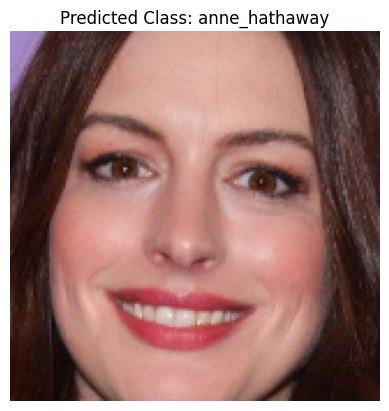

In [ ]:
import cv2
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

def get_embedding(model, face):
    # Resize the face to match the model's input size (160x160)
    face = cv2.resize(face, (160, 160))

    # Normalize pixel values to be in the range [-1, 1]
    face = (face / 255.0 - 0.5) * 2.0

    # Expand dimensions to match the model's expected input shape
    sample = np.expand_dims(face, axis=0)

    # Make prediction to get embedding
    yhat = model.predict(sample)
    return yhat[0]



# Assuming num_classes is defined somewhere in your code
num_classes = 14

# Assuming best_model is defined somewhere in your code as an SVM model

# Load the image
# image_url = 'blob:https://colab.research.google.com/d46071b7-3f57-4db7-bf49-e633346b6619'
image_url = 'https://imgs.search.brave.com/MwaBPNHhF6Q7-44QxfgjU9KHjy_v_0hVVoiRraWVlfg/rs:fit:860:0:0/g:ce/aHR0cHM6Ly9oaXBz/LmhlYXJzdGFwcHMu/Y29tL2htZy1wcm9k/L2ltYWdlcy9nZXR0/eWltYWdlcy0xMjAy/NDI5OTA0LmpwZz9j/cm9wPTF4dzoxLjB4/aDtjZW50ZXIsdG9w/JnJlc2l6ZT02NDA6/Kg'


req = urllib.request.urlopen(image_url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Load a pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(img_rgb, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Iterate through the detected faces
for i, (x, y, w, h) in enumerate(faces):
    # Extract the face
  face_img = img_rgb[y:y + h, x:x + w]
  # input_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
  input_img = cv2.resize(face_img, (160, 160))
  input_face = np.array(input_img)
  input_embedding = get_embedding(facenet_model, input_face)
  input_embedding_norm = in_encoder.transform(np.array([input_embedding]))
  predicted_class = best_model.predict(input_embedding_norm)
  predicted_class_label = out_encoder.inverse_transform(predicted_class)[0]
  plt.imshow(input_img)
  plt.title(f"Predicted Class: {predicted_class_label}")
  facenet_predictions.append(predicted_class_label)
  plt.axis('off')
  plt.show()

    # # Display the face
    # plt.title(f"Predicted Class Label for Face {i+1}: {predicted_class_label}")
    # plt.axis('off')
    # plt.show()


## Getting results using CNN model

we are storing the results obtained in a list named CNN_predictions

1/1 [==============================] - 0s 47ms/step
Predicted Class Label for Face: 0


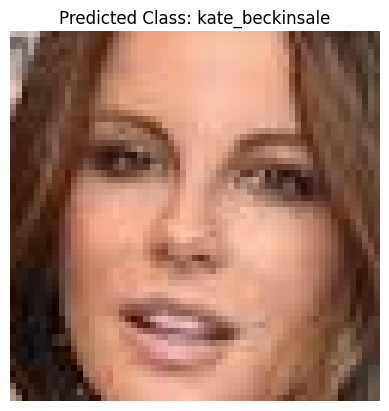

In [ ]:
import cv2
import requests
import numpy as np
from PIL import Image
from io import BytesIO
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
CNN_prediction = []
# Download image from URL
image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEluXvXakm4C9WmfGzh-vAor3Q_-YyfTI4ZA&usqp=CAU'
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
img = np.array(img)

# Convert BGR image to RGB
img_rgb = img

# Load a pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(img_rgb, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Example: Load a pre-trained model
model = CNN

# Iterate through the detected faces
for (x, y, w, h) in faces:
    # Extract the face
    face_img = img_rgb[y:y + h, x:x + w]
    orig_img = face_img

    face_img = cv2.resize(face_img, (324, 324))

    # Convert the image to a numpy array
    face_array = image.img_to_array(face_img)

    # Expand the dimensions to match the model input shape (1, 224, 224, 3)
    face_array = np.expand_dims(face_array, axis=0)

    # Normalize pixel values to be between 0 and 1
    face_array /= 255.0

    # Make predictions using the trained model
    predictions = model.predict(face_array)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions)
    CNN_prediction.append(people[predicted_class_index-1])
    print(f"Predicted Class Label for Face: {predicted_class_index}")
    plt.imshow(orig_img)
    plt.title(f"Predicted Class: {predicted_class_label}")
    facenet_predictions.append(predicted_class_label)
    plt.axis('off')
    plt.show()

In [ ]:
for x in CNN_prediction:
  print(x)

madonna
dwayne_johnson
madonna
anne_hathaway
jerry_seinfeld


In [ ]:
n = len(CNN_prediction)
print(n)

5


Ensambling the data obtained from all of the models together and printing the finally obtained data
Here all of the three models are given weights directly proportional to there corresponding validation accuracies

In [ ]:
n = len(facenet_predictions)
n = min(n, len(CNN_prediction))
n = min(n, len(vgg_predictions))
for i in range(n):
    # wt_vgg, wt_cnn, wt_facenet
    dict1 = {}

    # Calculate the weighted sum for each prediction
    dict1[CNN_prediction[i]] = wt_cnn
    dict1[facenet_predictions[i]] = wt_facenet
    dict1[vgg_predictions[i]] = wt_vgg

    # Find the class with the maximum weighted sum
    max_key = max(dict1, key=dict1.get)

    print(max_key)

arnold_schwarzenegger
will_smith
sofia_vergara
elton_john
jerry_seinfeld
